#ASSIGNMENT 3 (Date of submission: 14/06/2023)
#A) Plot bibliographic graph(or its subgraph) for a hetrogenous network and visualize it

In [37]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Load the ACM.csv dataset using pandas
data = pd.read_csv('/content/Acm.csv')
data.head(5)

,title,authors_name,auths_institution,auths_per_institution,abstract,location,pub_date,citation_nbres,download_nbres,dio
0,Blockchain Extension for PostgreSQL Data Storage,"Yash Madhwal,Darkhan Nurlybay,Yury A Yanovich","Skolkovo Institute of Science and Technology,N...",(Yash Madhwal) FROM (Skolkovo Institute of Sci...,Blockchain is an emerging technology with the ...,Russia,02-Oct-21,0,"1,272",https://doi.org/10.1145/3475992.3476002
1,Overview of Blockchain Data Privacy Protection,"Qi Zhang,Hai Lv,Junwei Ma,Jingye Li,Jieni Zhang","State Grid Shanxi Electric Power Company,Beiji...",(Qi Zhang) FROM (State Grid Shanxi Electric Po...,Blockchain has the advantages of decentralizat...,China,02-Oct-21,0,447,https://doi.org/10.1145/3475992.3476000
2,Blockchain Enabled IoT Edge Computing,Pankaj Mendki,"Talentica Software Pvt Ltd, Pune",(Pankaj Mendki) FROM (Talentica Software Pvt L...,Number of internet connected devices is increa...,India,15-Mar-19,15,"1,526",https://doi.org/10.1145/3320154.3320166
3,Towards a Blockchain Deployment at UAE Univers...,"Leila Ismail,Heba Hameed,Mahra AlShamsi,Manaye...","IEEE, College of Information Technology, UAE U...","(Leila Ismail) FROM (IEEE, College of Informat...",Blockchain technology initially developed for ...,UAE,15-Mar-19,13,"1,374",https://doi.org/10.1145/3320154.3320156
4,PoolParty: Efficient Blockchain-Agnostic Decen...,"Nicholas Dana Troutman,Aron Laszka","University of Houston,University of Houston",(Nicholas Dana Troutman) FROM (University of H...,Blockchain mining is increasingly dominated by...,USA,20-Jul-21,0,80,https://doi.org/10.1145/3460537.3460554


In [39]:
# Remove rows with NaN or null values
data.dropna(inplace=True)

In [40]:
# Remove duplicates
data.drop_duplicates(inplace=True)

# Remove rows with null values
data.dropna(inplace=True)

# Reset the index
data.reset_index(drop=True, inplace=True)

# Save the cleaned dataset to a new file
data.to_csv('ACM_cleaned.csv', index=False)

In [41]:
# Extract relevant columns for bibliographic connections
data_citations = data[['location', 'citation_nbres']]

unique_nodes = set(data['location']).union(set(data['citation_nbres']))
print(unique_nodes)

# Create an empty directed graph
graph = nx.DiGraph()

{0, 'København', 'Russia', 'Hyderabad India', 1, 2, 3, 4, 'Singapore', 'Namibia', 5, 6, 'Taiwan', 7, 8, 9, 10, 11, 12, 13, 14, 'Iran', 'United Kingdom', 15, 16, 17, 'de Madrid', 'Bulgaria', 'Australia', 'GA', 21, 22, 23, 'Norway', 'Luxembourg', 26, 27, 32, 33, 36, 37, 'UK', 43, 44, 'Information Security Group', 'Rome - Italy', 51, 'MN', 54, 'San Antonio', 58, 59, 'India', 'San Jose CA USA', 62, 'china', 67, 69, 71, 73, 'Davis', 'Japan', 79, 'Guangzhou China', 82, 85, 'IL', 'Sweden', 90, 'Nanchang', 18, 91, 'South Korea', 'HK', 19, 92, 20, 'China', '??', 108, 'Myanmar', 620, 109, 'Canada', 24, 125, 'The Netherlands', 25, 'Morocco', 'Imperial College London', 'P. R. China', 'Belgium', 'United Kingdoms', 'CHN', 'Indonesia', 'Macao', 'Switzerland', 'Taiwan Roc', 'RI', 150, 'New York', 'Cyprus', 155, 'UAE', 'MA', 'Ireland', 'Berlin', 'JAPAN', 179, 'Virginia', 'Lanzhou Gansu China', 188, 'Qatar', 'P.R. China', 'Israel', 'United States', 'Ecuador', 'INDONESIA', 'Germany', 'University of Nicos

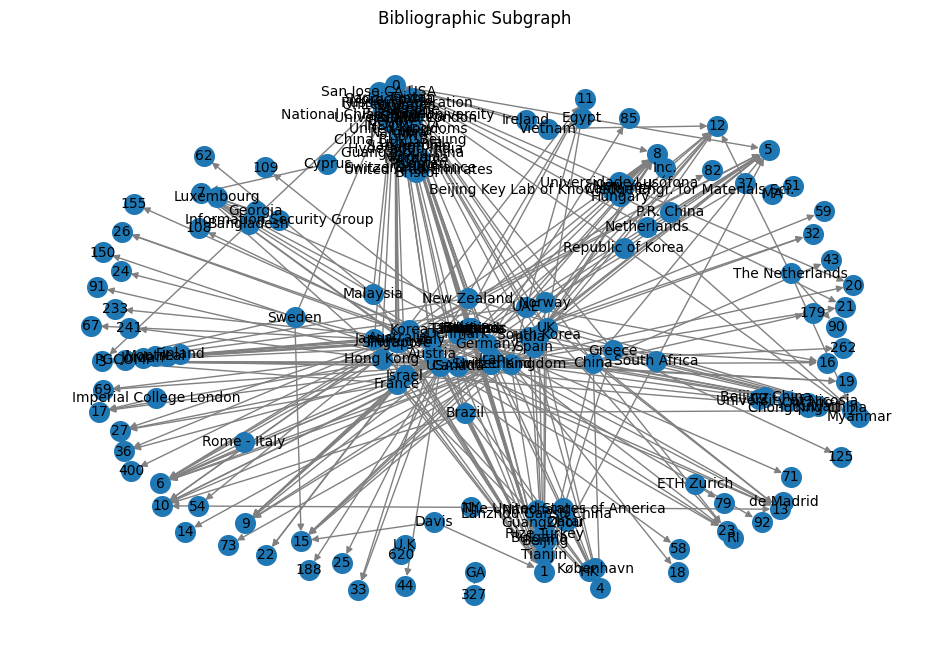

In [42]:
# Add nodes to the graph
for _, row in df_citations.iterrows():
    paper_title = row['location']
    citation = row['citation_nbres']

    # Add paper title as a node
    graph.add_node(paper_title)

    # Add citation as a node
    graph.add_node(citation)

    # Add edge between paper title and citation
    graph.add_edge(paper_title, citation)

# Visualize the graph
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 8))
nx.draw_networkx(graph, pos, with_labels=True, node_size=200, font_size=10, edge_color='gray')
plt.title('Bibliographic Subgraph')
plt.axis('off')
plt.show()

B) Node and edge classification
   Number of topics or papers (similarity in biblographic graph like topic modeling(just an eg do not do)
   Use any classifier or clustering(preferable)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


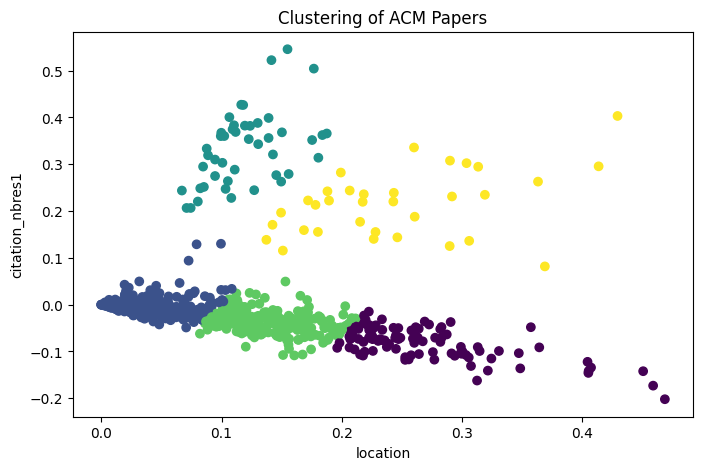

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
# Extract node features (number of topics or papers)
node_features = np.array([len(graph[node]) for node in graph.nodes()]).reshape(-1, 1)

# Remove rows with NaN or null values
data.dropna(inplace=True)

# Select relevant features for clustering (e.g., abstracts)
data = data['title'].tolist()

# Vectorize the abstracts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data)

# Reduce dimensionality using Truncated SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_svd)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='viridis')
plt.title('Clustering of ACM Papers')
plt.xlabel('location')
plt.ylabel('citation_nbres1')
plt.show()


<ipython-input-50-afa22a8107b3>:18: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


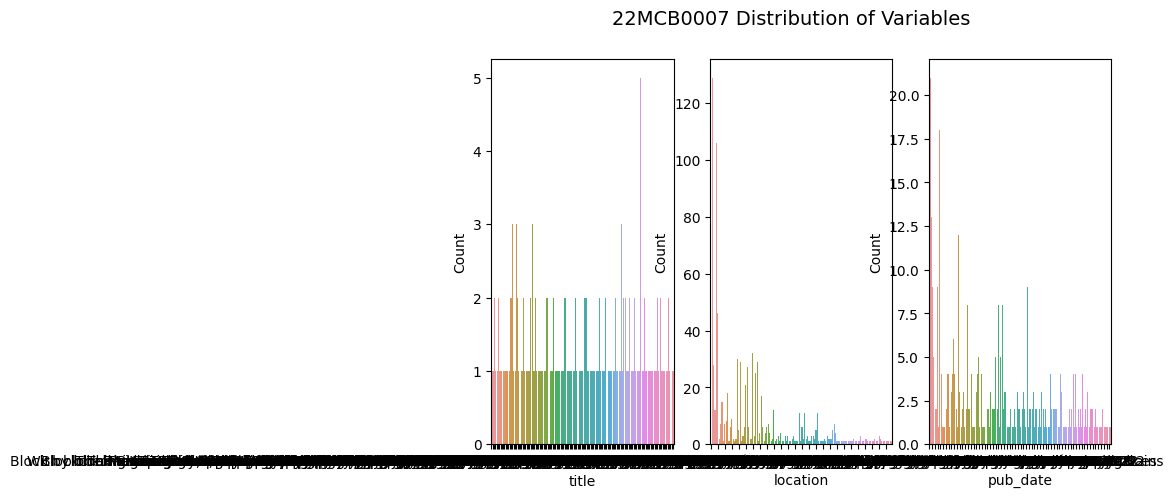

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to evaluate health on
columns_to_evaluate = ['title', 'location', 'pub_date']

fig, axes = plt.subplots(1, len(columns_to_evaluate), figsize=(8, 5))
axes = axes.flatten()

for i, col in enumerate(columns_to_evaluate):
    g = sns.countplot(x=col, data=df, ax=axes[i])
    if len(df[col].unique()) > 5:
        g.set_xticks(range(0, len(df[col].unique()), 5))
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.suptitle('22MCB0007 Distribution of Variables', fontsize=14)
plt.tight_layout()
plt.show()